### Phần A

In [2]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('dulieu.csv')

# Hiển thị 5 dòng đầu tiên
print(df)

   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender    Campus
0        S001       Math     85            90.0          5.0    Male  Campus_A
1        S002    Physics     85             4.0          NaN  Female  Campus_B
2        S003  Chemistry     78            70.0          NaN    Male  Campus_A
3        S004       Math     92            95.0          6.0  Female  Campus_C
4        S005    Physics     65            60.0          3.0     NaN  Campus_B
5        S006  Chemistry     88             NaN          5.0    Male  Campus_A
6        S007       Math     80             NaN          4.0  Female  Campus_C
7        S008    Physics     75            88.0          5.0    Male  Campus_B
8        S009  Chemistry     90            92.0          NaN  Female  Campus_A
9        S010       Math     70            65.0          3.0    Male  Campus_C
10       S011    Physics     82            75.0          4.0  Female  Campus_B
11       S012  Chemistry     85             NaN     

### Phần B


In [ ]:
#câu 1
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('dulieu.csv')
# Tính tỷ lệ phần trăm giá trị thiếu trong từng cột
missing_percentage = df.isnull().mean() * 100

# Làm tròn kết quả đến 2 chữ số thập phân
missing_percentage = missing_percentage.round(2)

# In kết quả
print("Tỷ lệ phần trăm giá trị thiếu trong từng cột:")
print(missing_percentage)

Tỷ lệ phần trăm giá trị thiếu trong từng cột:
Student_ID         0.00
Course             0.00
Score              0.00
Attendance (%)    23.33
Study_Hours       16.67
Gender            13.33
Campus             0.00
dtype: float64


Điểm trung bình theo Course và Campus:
 Course    Chemistry       Math  Physics
Campus                                 
Campus_A       81.4  85.000000      NaN
Campus_B        NaN        NaN     79.6
Campus_C        NaN  84.222222      NaN


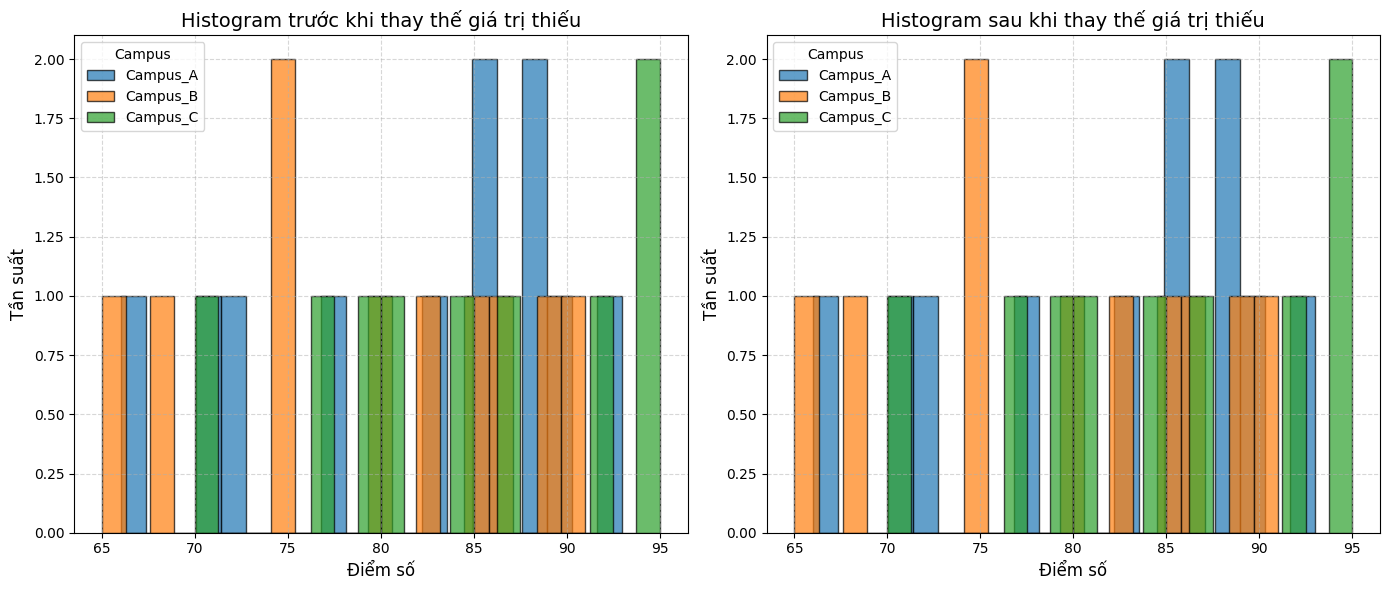

In [ ]:
# câu 2
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là dữ liệu đã được load từ dulieu.csv
df_original = df.copy()

# Xử lý thiếu giá trị (ví dụ: điền trung bình cột)
df['Score'] = df['Score'].fillna(df['Score'].mean())

# Tính điểm trung bình theo Course và Campus
mean_scores = df.groupby(['Campus', 'Course'])['Score'].mean().unstack()
print("Điểm trung bình theo Course và Campus:\n", mean_scores)

# Vẽ histogram trước và sau khi thay thế giá trị thiếu
plt.figure(figsize=(14, 6))

# Trước khi thay thế
plt.subplot(1, 2, 1)
for campus in df_original['Campus'].dropna().unique():
    scores = df_original[df_original['Campus'] == campus]['Score']
    plt.hist(scores, alpha=0.7, bins=20, label=campus, edgecolor='black')
plt.title("Histogram trước khi thay thế giá trị thiếu", fontsize=14)
plt.xlabel("Điểm số", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.legend(title="Campus", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Sau khi thay thế
plt.subplot(1, 2, 2)
for campus in df['Campus'].dropna().unique():
    scores = df[df['Campus'] == campus]['Score']
    plt.hist(scores, alpha=0.7, bins=20, label=campus, edgecolor='black')
plt.title("Histogram sau khi thay thế giá trị thiếu", fontsize=14)
plt.xlabel("Điểm số", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.legend(title="Campus", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### Thay thế giá trị thiếu trong Score bằng trung bình điểm của từng môn học (Course), giúp giữ tính nhất quán cho môn học đó. Do mỗi campus có đặc điểm điểm số khác nhau, điền giá trị thiếu theo trung bình điểm của từng campus sẽ phản ánh chính xác hơn sự phân bố điểm của sinh viên. So sánh phân bố điểm trước và sau khi điền giá trị thiếu giúp đánh giá tác động của phương pháp điền. Phương pháp điền theo Campus tốt hơn vì nó bảo toàn đặc điểm riêng của từng campus, tránh làm sai lệch dữ liệu.

In [6]:
#câu 3
import pandas as pd
import numpy as np

df = pd.read_csv('dulieu.csv')

# Lấy cột Study_Hours và loại bỏ giá trị NaN
study_hours = df['Study_Hours'].dropna()

# Tính độ lệch chuẩn bằng NumPy
std_dev = np.std(study_hours)

# Tính trung vị bằng NumPy
median = np.median(study_hours)

# In kết quả
print(f"Độ lệch chuẩn của Study_Hours: {std_dev:.2f}")
print(f"Trung vị của Study_Hours: {median:.2f}")


Độ lệch chuẩn của Study_Hours: 1.24
Trung vị của Study_Hours: 5.00


##### Độ lệch chuẩn lớn → thời gian học giữa sinh viên không đồng đều.Tăng thời gian học cho nhóm thấp hơn trung vị sẽ giúp thu hẹp khoảng cách này.Điều này giúp nâng điểm trung bình toàn lớp, vì thời gian học thường liên quan trực tiếp đến kết quả học tập.

In [7]:
#câu 4

df_cleaned = df[['Campus', 'Attendance (%)', 'Score']].dropna()

# Tính correlation giữa Attendance và Score cho từng Campus
correlations = df_cleaned.groupby("Campus").apply(lambda g: g['Attendance (%)'].corr(g['Score']))

# In kết quả
print("Hệ số tương quan giữa Attendance và Score theo Campus:\n")
print(correlations)


Hệ số tương quan giữa Attendance và Score theo Campus:

Campus
Campus_A    0.899397
Campus_B    0.152856
Campus_C    0.950866
dtype: float64


###### Ở Campus_C, sự chuyên cần ảnh hưởng mạnh đến kết quả → kiểm soát điểm danh chặt giúp cải thiện điểm.

###### Ở Campus_A, tương quan vừa phải → kết hợp giữa điểm danh và hỗ trợ học tập.

###### Ở Campus_B, điểm số ít phụ thuộc chuyên cần → nên tập trung vào nội dung học và hỗ trợ cá nhân hóa.

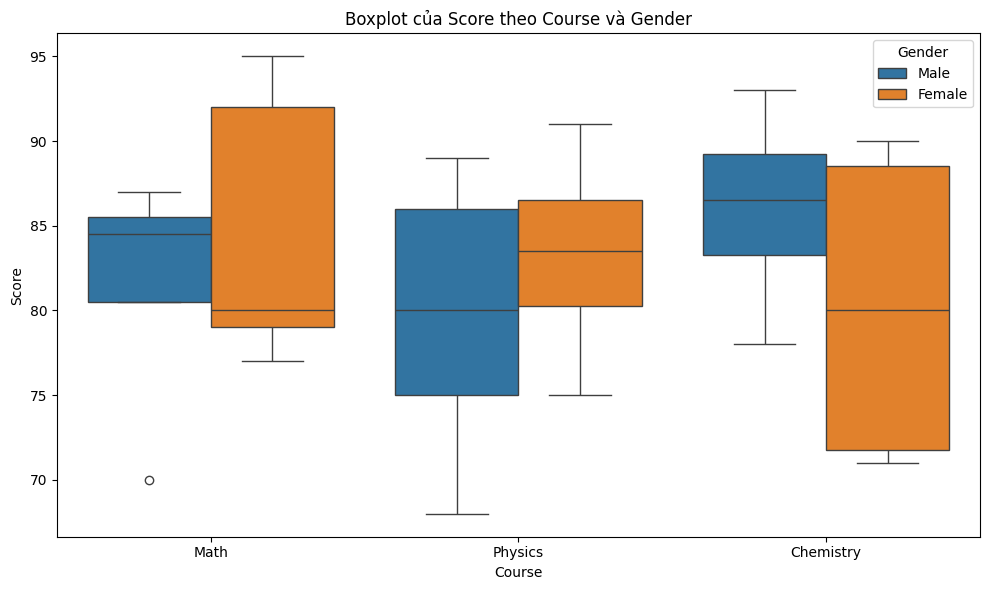


📌 Sinh viên nằm ngoài khoảng IQR (outliers):

  Student_ID Course Gender  Score
9       S010   Math   Male     70


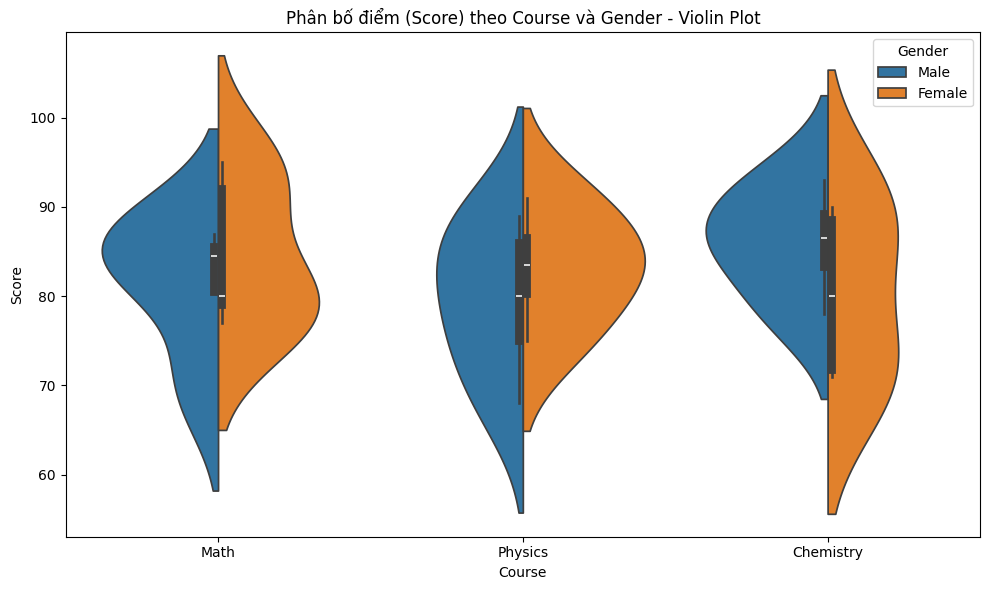

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('dulieu.csv')

# Loại bỏ các hàng có giá trị NaN trong các cột cần thiết
df_filtered = df[['Student_ID', 'Course', 'Gender', 'Score']].dropna()

# Vẽ boxplot theo Course & Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='Score', hue='Gender', data=df_filtered)
plt.title("Boxplot của Score theo Course và Gender")
plt.xlabel("Course")
plt.ylabel("Score")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Xác định outlier bằng IQR cho từng nhóm Course-Gender
outliers = []
for (course, gender), group in df_filtered.groupby(['Course', 'Gender']):
    q1 = group['Score'].quantile(0.25)
    q3 = group['Score'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_rows = group[(group['Score'] < lower) | (group['Score'] > upper)]
    outliers.append(outlier_rows)

# Gộp danh sách các sinh viên outlier
outlier_df = pd.concat(outliers)

# In kết quả
print("\n📌 Sinh viên nằm ngoài khoảng IQR (outliers):\n")
print(outlier_df[['Student_ID', 'Course', 'Gender', 'Score']])

# Violin plot: kết hợp giữa boxplot và phân bố
plt.figure(figsize=(10, 6))
sns.violinplot(x='Course', y='Score', hue='Gender', data=df_filtered, split=True)
plt.title("Phân bố điểm (Score) theo Course và Gender - Violin Plot")
plt.xlabel("Course")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


In [9]:
# câu 6
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('dulieu.csv')

# Loại bỏ các hàng có giá trị NaN trong các cột cần thiết
df_filtered = df[['Student_ID', 'Course', 'Score', 'Study_Hours']].dropna()

# Tạo cột Efficiency
df_filtered['Efficiency'] = df_filtered['Score'] / df_filtered['Study_Hours']

# Tìm sinh viên có Efficiency cao nhất
max_efficiency_student = df_filtered.loc[df_filtered['Efficiency'].idxmax()]

# In sinh viên có Efficiency cao nhất
print(f"Sinh viên có Efficiency cao nhất: {max_efficiency_student['Student_ID']}")
print(f"Efficiency: {max_efficiency_student['Efficiency']:.2f}")

# Đề xuất phần thưởng học bổng
print("\nĐề xuất phần thưởng:")
print("Sinh viên có Efficiency cao nhất sẽ nhận một học bổng, "
"vì họ có khả năng tối ưu hóa thời gian học tập hiệu quả. Phần thưởng này sẽ thúc đẩy động lực học tập và khuyến khích các sinh viên khác cải thiện cách phân bổ thời gian học và kết quả học tập của mình.")


Sinh viên có Efficiency cao nhất: S021
Efficiency: 33.00

Đề xuất phần thưởng:
Sinh viên có Efficiency cao nhất sẽ nhận một học bổng, vì họ có khả năng tối ưu hóa thời gian học tập hiệu quả. Phần thưởng này sẽ thúc đẩy động lực học tập và khuyến khích các sinh viên khác cải thiện cách phân bổ thời gian học và kết quả học tập của mình.


##### Việc trao phần thưởng cho sinh viên có chỉ số Efficiency cao nhất khuyến khích các sinh viên khác tìm cách tối ưu hóa việc học của họ. Sinh viên sẽ học được cách phân bổ thời gian hợp lý giữa việc học và các hoạt động khác, từ đó cải thiện kết quả học tập của mình.

In [10]:
#Câu 7 
# Điền giá trị thiếu ở cột Gender bằng mode (giới tính phổ biến nhất)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Tính tỷ lệ sinh viên nữ (Gender = Female) trong từng Course
female_ratio = df[df['Gender'] == 'Female'].groupby('Course').size() / df.groupby('Course').size()

# In kết quả tỷ lệ sinh viên nữ
print("Tỷ lệ sinh viên nữ trong từng Course:")
print(female_ratio)

Tỷ lệ sinh viên nữ trong từng Course:
Course
Chemistry    0.6
Math         0.6
Physics      0.5
dtype: float64


###### Để đảm bảo môi trường học tập cân bằng giới tính, cần áp dụng chính sách khuyến khích tuyển sinh cả nam và nữ trong các môn học kỹ thuật và khoa học, đặc biệt là trong các ngành như Toán học và Khoa học Máy tính. Có thể áp dụng các chương trình học bổng cho sinh viên nữ trong các ngành này hoặc tạo ra các câu lạc bộ, sự kiện dành riêng cho nữ sinh để tạo động lực học tập.Chính sách này sẽ thúc đẩy sự tham gia của nữ giới trong các ngành kỹ thuật và khoa học, giảm thiểu sự chênh lệch giới tính và tạo ra một môi trường học tập đa dạng, nơi cả nam và nữ đều có cơ hội học tập và phát triển đồng đều.
###### Chính sách cân bằng giới tính sẽ giúp xây dựng một môi trường học tập công bằng và không phân biệt giới tính. Khi cả nam và nữ có cơ hội học tập và phát triển trong các ngành nghề đa dạng, sẽ thúc đẩy sự sáng tạo và đổi mới trong giảng dạy. Ngoài ra, việc cân bằng giới tính còn giúp sinh viên học hỏi lẫn nhau, tạo ra môi trường học tập lành mạnh, nơi mà mọi cá nhân đều cảm thấy có giá trị và được tôn trọng.

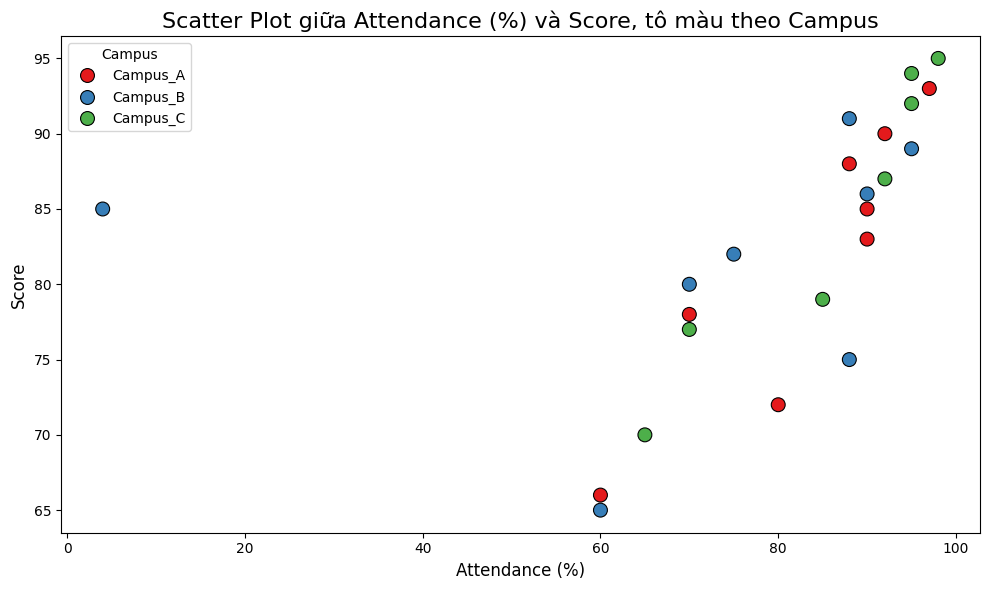


Tỷ lệ Attendance trung bình của từng Campus:
Campus
Campus_A    83.375000
Campus_B    71.250000
Campus_C    85.714286
Name: Attendance (%), dtype: float64

Chiến lược cho Campus_A: Campus Campus_A: Khuyến khích sinh viên tham gia lớp học thêm ngoài giờ học chính, cung cấp các lớp học trực tuyến linh hoạt cho sinh viên. Tạo ra các chương trình học bổng nhỏ cho sinh viên có Attendance cao.
Chiến lược cho Campus_B: Campus Campus_B: Khuyến khích sinh viên tham gia lớp học thêm ngoài giờ học chính, cung cấp các lớp học trực tuyến linh hoạt cho sinh viên. Tạo ra các chương trình học bổng nhỏ cho sinh viên có Attendance cao.
Chiến lược cho Campus_C: Campus Campus_C: Tiếp tục duy trì các phương pháp học tập hiện tại, đồng thời khuyến khích sinh viên giữ vững tinh thần học tập. Tổ chức các buổi trao đổi giữa các sinh viên xuất sắc để học hỏi thêm.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã đọc dữ liệu vào DataFrame df
df = pd.read_csv('dulieu.csv')

# 1. Vẽ scatter plot giữa Attendance (%) và Score, tô màu theo Campus
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Attendance (%)', y='Score', hue='Campus', palette='Set1', s=100, edgecolor='black')
plt.title('Scatter Plot giữa Attendance (%) và Score, tô màu theo Campus', fontsize=16)
plt.xlabel('Attendance (%)', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(title='Campus', loc='upper left')
plt.tight_layout()
plt.show()

# 2. Đề xuất chiến lược cải thiện điểm danh cho từng Campus dựa trên phân bố dữ liệu
# Dựa trên phân bố dữ liệu, ta có thể đưa ra các chiến lược khác nhau cho từng Campus

# Tính tỷ lệ Attendance trung bình của từng Campus
attendance_avg_by_campus = df.groupby('Campus')['Attendance (%)'].mean()
print(f"\nTỷ lệ Attendance trung bình của từng Campus:\n{attendance_avg_by_campus}\n")

# Đề xuất chiến lược cải thiện điểm danh cho từng Campus
for campus, avg_attendance in attendance_avg_by_campus.items():
    if avg_attendance < 70:
        # Campus có tỷ lệ Attendance thấp (dưới 70%)
        strategy = f"Campus {campus}: Cần tăng cường các hoạt động ngoại khóa hấp dẫn, như sự kiện học tập, các buổi chia sẻ kinh nghiệm. Đưa ra các phần thưởng cho sinh viên tham gia đầy đủ để tạo động lực."
        print(f"Chiến lược cho {campus}: {strategy}")
    elif avg_attendance < 85:
        # Campus có tỷ lệ Attendance trung bình (70%-85%)
        strategy = f"Campus {campus}: Khuyến khích sinh viên tham gia lớp học thêm ngoài giờ học chính, cung cấp các lớp học trực tuyến linh hoạt cho sinh viên. Tạo ra các chương trình học bổng nhỏ cho sinh viên có Attendance cao."
        print(f"Chiến lược cho {campus}: {strategy}")
    else:
        # Campus có tỷ lệ Attendance cao (trên 85%)
        strategy = f"Campus {campus}: Tiếp tục duy trì các phương pháp học tập hiện tại, đồng thời khuyến khích sinh viên giữ vững tinh thần học tập. Tổ chức các buổi trao đổi giữa các sinh viên xuất sắc để học hỏi thêm."
        print(f"Chiến lược cho {campus}: {strategy}")


Trung bình Score của từng Course sau khi điền giá trị thiếu:

Course
Chemistry    81.4
Math         84.3
Physics      79.6
Name: Score, dtype: float64


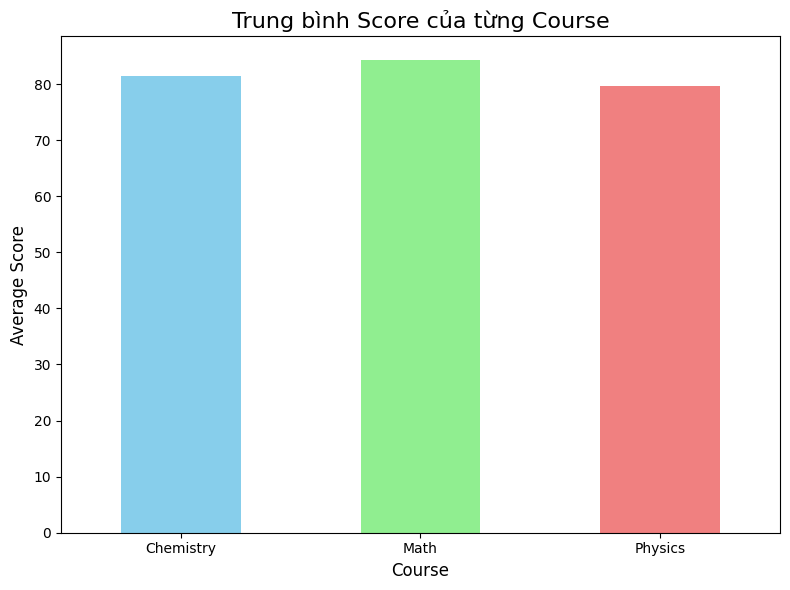


Môn học có điểm trung bình thấp nhất: Physics với điểm trung bình 79.60

Chiến lược cải thiện cho môn học Physics: Cải thiện chiến lược giảng dạy môn Vật lý bằng cách tạo các thí nghiệm thực tế để giúp sinh viên hiểu rõ lý thuyết, đồng thời áp dụng các công cụ mô phỏng để minh họa các hiện tượng vật lý.


In [12]:
# câu 9
# 1. Điền giá trị thiếu trong cột 'Score' bằng trung bình của cột
df['Score'] = df['Score'].fillna(df['Score'].mean())  # Điền giá trị thiếu bằng giá trị trung bình của Score

# 2. Tính trung bình Score của từng Course
average_score_per_course = df.groupby('Course')['Score'].mean()

# In kết quả trung bình Score của từng Course
print("Trung bình Score của từng Course sau khi điền giá trị thiếu:\n")
print(average_score_per_course)

# 3. Vẽ bar chart so sánh trung bình Score của từng Course
plt.figure(figsize=(8, 6))
average_score_per_course.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Trung bình Score của từng Course', fontsize=16)
plt.xlabel('Course', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Đề xuất chiến lược cải thiện cho môn học có điểm trung bình thấp nhất
lowest_score_course = average_score_per_course.idxmin()  # Môn học có điểm trung bình thấp nhất
lowest_score_value = average_score_per_course.min()  # Giá trị điểm trung bình thấp nhất

print(f"\nMôn học có điểm trung bình thấp nhất: {lowest_score_course} với điểm trung bình {lowest_score_value:.2f}")

# Đề xuất chiến lược cải thiện cho môn học có điểm trung bình thấp nhất
if lowest_score_course == 'Math':
    strategy = "Cải thiện chiến lược giảng dạy môn Toán bằng cách áp dụng phương pháp giảng dạy trực quan, sử dụng nhiều bài tập thực tế, và tổ chức các buổi ôn tập thêm để sinh viên nắm vững kiến thức cơ bản."
elif lowest_score_course == 'Physics':
    strategy = "Cải thiện chiến lược giảng dạy môn Vật lý bằng cách tạo các thí nghiệm thực tế để giúp sinh viên hiểu rõ lý thuyết, đồng thời áp dụng các công cụ mô phỏng để minh họa các hiện tượng vật lý."
else:
    strategy = "Cải thiện chiến lược giảng dạy môn Hóa học bằng cách áp dụng phương pháp học tương tác, giúp sinh viên tiếp cận trực tiếp với các thí nghiệm, làm việc nhóm để giải quyết các vấn đề thực tế."

print(f"\nChiến lược cải thiện cho môn học {lowest_score_course}: {strategy}")


In [13]:
# Câu 10 
# Tìm các sinh viên có Attendance (%) dưới 70% nhưng Score trên 85
high_score_low_attendance = df[(df['Attendance (%)'] < 70) & (df['Score'] > 85)]

# In các sinh viên thoả mãn điều kiện
print("Sinh viên có Attendance (%) dưới 70% nhưng Score trên 85:")
print(high_score_low_attendance[['Student_ID', 'Course', 'Score', 'Attendance (%)']])
# Đề xuất nghiên cứu nội bộ
study_proposal = """Nghiên cứu nội bộ cần tập trung vào việc xác định các yếu tố giúp sinh viên đạt điểm cao mặc dù điểm danh thấp. 
Các yếu tố có thể bao gồm:
- **Kỹ năng tự học**: Sinh viên có thể chủ động tìm hiểu và nghiên cứu tài liệu ngoài lớp, sử dụng các phương pháp học tập độc lập như học qua video, đọc tài liệu chuyên sâu.
- **Tài liệu học tập**: Các tài liệu bổ sung, bài giảng trực tuyến, và tài nguyên học tập miễn phí có thể giúp sinh viên nắm vững kiến thức mà không cần tham gia lớp học trực tiếp.
- **Công nghệ hỗ trợ học tập**: Sử dụng phần mềm học tập, ứng dụng di động để tự ôn luyện và làm bài kiểm tra, có thể tạo ra một môi trường học tập linh hoạt và hiệu quả cho sinh viên.

Dựa trên kết quả nghiên cứu này, trường học có thể triển khai các chương trình hỗ trợ phát triển kỹ năng tự học, cung cấp tài liệu học tập phong phú và hỗ trợ công nghệ học trực tuyến cho tất cả sinh viên. Điều này sẽ giúp tối ưu hóa phương pháp học và cải thiện kết quả học tập cho mọi sinh viên."""

# In đề xuất nghiên cứu
print("\nĐề xuất nghiên cứu nội bộ:")
print(study_proposal)

# Giải thích cách áp dụng kết quả cho toàn trường
explanation = """Áp dụng kết quả từ nghiên cứu này cho toàn trường sẽ giúp tạo ra một hệ thống học tập linh hoạt và sáng tạo. Việc khuyến khích sinh viên phát triển kỹ năng tự học, cung cấp các tài liệu học tập phong phú, 
và áp dụng công nghệ sẽ giúp tất cả sinh viên có thể tiếp cận kiến thức một cách hiệu quả hơn, đặc biệt là đối với những sinh viên không thể tham gia đầy đủ các buổi học trực tiếp."""
print("\nGiải thích cách áp dụng kết quả cho toàn trường:")
print(explanation)

Sinh viên có Attendance (%) dưới 70% nhưng Score trên 85:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%)]
Index: []

Đề xuất nghiên cứu nội bộ:
Nghiên cứu nội bộ cần tập trung vào việc xác định các yếu tố giúp sinh viên đạt điểm cao mặc dù điểm danh thấp. 
Các yếu tố có thể bao gồm:
- **Kỹ năng tự học**: Sinh viên có thể chủ động tìm hiểu và nghiên cứu tài liệu ngoài lớp, sử dụng các phương pháp học tập độc lập như học qua video, đọc tài liệu chuyên sâu.
- **Tài liệu học tập**: Các tài liệu bổ sung, bài giảng trực tuyến, và tài nguyên học tập miễn phí có thể giúp sinh viên nắm vững kiến thức mà không cần tham gia lớp học trực tiếp.
- **Công nghệ hỗ trợ học tập**: Sử dụng phần mềm học tập, ứng dụng di động để tự ôn luyện và làm bài kiểm tra, có thể tạo ra một môi trường học tập linh hoạt và hiệu quả cho sinh viên.

Dựa trên kết quả nghiên cứu này, trường học có thể triển khai các chương trình hỗ trợ phát triển kỹ năng tự học, cung cấp tài liệu học tập phong phú và h

In [70]:
# Câu 11 được + 4 điểm

In [14]:
import pandas as pd
from scipy.stats import skew

# Giả sử df là DataFrame chứa dữ liệu
df = pd.read_csv('dulieu.csv')

# Tính độ lệch (skewness) của cột 'Score'
skewness = skew(df['Score'].dropna())  # Loại bỏ giá trị thiếu trước khi tính

# In kết quả skewness
print(f"Độ lệch (skewness) của Score: {skewness}")


Độ lệch (skewness) của Score: -0.3716043732996287


##### Phân phối điểm lệch trái, có xu hướng có ít sinh viên đạt điểm thấp hơn. Để công bằng hơn, có thể áp dụng phương pháp tính điểm theo phân vị, hoặc điều chỉnh hệ thống tính điểm sao cho các điểm thấp không bị loại bỏ quá nhanh trong quá trình chấm điểm.

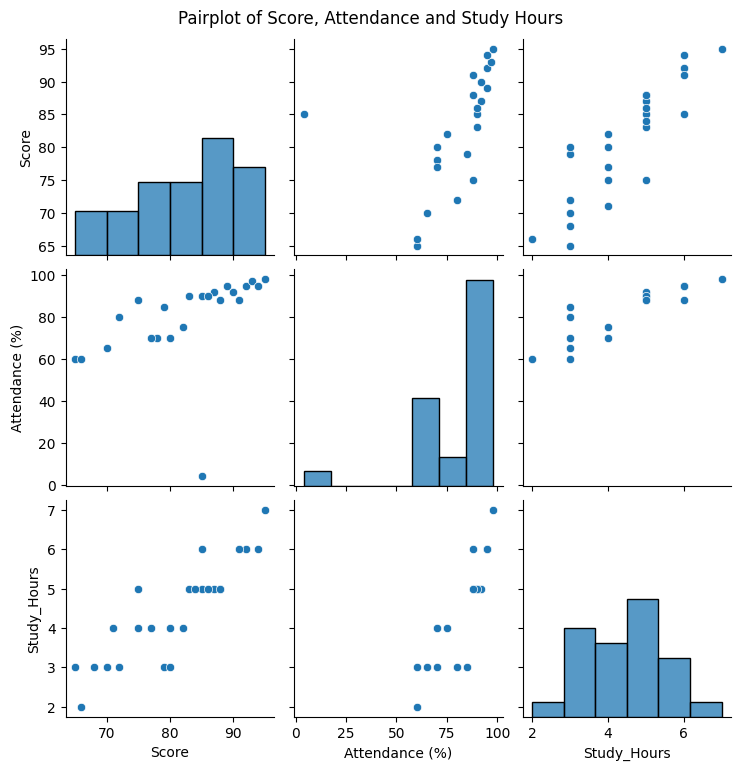

In [15]:
# Câu 13
# Vẽ pairplot
sns.pairplot(df[['Score', 'Attendance (%)', 'Study_Hours']])
plt.suptitle("Pairplot of Score, Attendance and Study Hours", y=1.02)
plt.show()

###### Mô hình kết hợp Attendance (%) và Study_Hours vào đánh giá học tập sẽ giúp tạo ra một môi trường học tập công bằng hơn, khuyến khích hành vi học tập tích cực và liên tục, giảm bớt sự thiên lệch từ các yếu tố bên ngoài và thúc đẩy sự cải tiến trong phương pháp giảng dạy. Nó phản ánh sự nỗ lực liên tục của sinh viên và không chỉ đánh giá một lần qua kỳ thi cuối kỳ, giúp sinh viên có động lực học tập và phát triển trong suốt quá trình học tập.

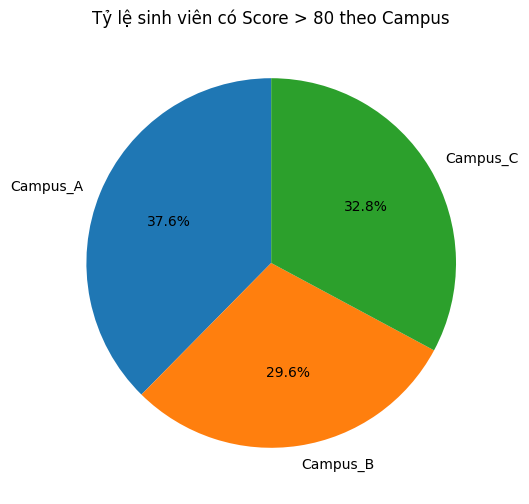

In [16]:
# Câu 14
# Tính tỷ lệ sinh viên có Score > 80 theo từng Campus
df['Score_Above_80'] = df['Score'] > 80
campus_group = df.groupby('Campus')['Score_Above_80'].mean()

# Vẽ pie chart so sánh tỷ lệ sinh viên có Score > 80 theo Campus
plt.figure(figsize=(8, 6))
campus_group.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, title='Tỷ lệ sinh viên có Score > 80 theo Campus')
plt.ylabel('')
plt.show()

In [17]:
# Hàm xác định sinh viên có điểm ngoài 2 độ lệch chuẩn
def identify_outliers(df):
    mean_score = df['Score'].mean()  # Tính trung bình của điểm
    std_score = df['Score'].std()  # Tính độ lệch chuẩn của điểm
    print(f"Trung bình điểm: {mean_score}")
    print(f"Độ lệch chuẩn: {std_score}")
    
    threshold_upper = mean_score + 2 * std_score  # Giới hạn trên
    threshold_lower = mean_score - 2 * std_score  # Giới hạn dưới
    
    print(f"Giới hạn trên: {threshold_upper}")
    print(f"Giới hạn dưới: {threshold_lower}")
    
    # Tìm sinh viên có điểm ngoài 2 độ lệch chuẩn
    outliers = df[(df['Score'] < threshold_lower) | (df['Score'] > threshold_upper)]
    return outliers

# Xác định sinh viên có điểm ngoài 2 độ lệch chuẩn
outliers = identify_outliers(df)
print("\nSinh viên có điểm ngoài 2 độ lệch chuẩn:")
print(outliers)


Trung bình điểm: 81.76666666666667
Độ lệch chuẩn: 8.57696728547404
Giới hạn trên: 98.92060123761475
Giới hạn dưới: 64.61273209571858

Sinh viên có điểm ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus, Score_Above_80]
Index: []


# Câu hỏi ANN

In [18]:

# câu 16

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
# Phương pháp điền giá trị thiếu bằng KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = df.copy()
df_knn_imputed[['Attendance (%)', 'Study_Hours']] = knn_imputer.fit_transform(df_knn_imputed[['Attendance (%)', 'Study_Hours']])

# Phương pháp điền giá trị thiếu bằng trung vị
median_imputer = SimpleImputer(strategy='median')
df_median_imputed = df.copy()
df_median_imputed[['Attendance (%)', 'Study_Hours']] = median_imputer.fit_transform(df_median_imputed[['Attendance (%)', 'Study_Hours']])

# In dữ liệu sau khi điền thiếu
print("\nDữ liệu sau khi điền giá trị thiếu bằng KNN Imputer:")
print(df_knn_imputed)

print("\nDữ liệu sau khi điền giá trị thiếu bằng trung vị:")
print(df_median_imputed)


Dữ liệu sau khi điền giá trị thiếu bằng KNN Imputer:
   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math     85       90.000000     5.000000    Male   
1        S002    Physics     85        4.000000     2.666667  Female   
2        S003  Chemistry     78       70.000000     3.333333    Male   
3        S004       Math     92       95.000000     6.000000  Female   
4        S005    Physics     65       60.000000     3.000000     NaN   
5        S006  Chemistry     88       89.333333     5.000000    Male   
6        S007       Math     80       68.333333     4.000000  Female   
7        S008    Physics     75       88.000000     5.000000    Male   
8        S009  Chemistry     90       92.000000     5.000000  Female   
9        S010       Math     70       65.000000     3.000000    Male   
10       S011    Physics     82       75.000000     4.000000  Female   
11       S012  Chemistry     85       92.666667     6.000000    Male   
12       S

### Đề xuất phương pháp thu thập dữ liệu thay thế để giảm thiểu giá trị thiếu:

#### - Sử dụng công nghệ tự động (hệ thống theo dõi tham gia lớp học và giờ học):

##### + Giải thích: Áp dụng hệ thống nhận diện khuôn mặt hoặc thẻ sinh viên để tự động thu thập dữ liệu tham gia lớp học, kết hợp với các ứng dụng theo dõi giờ học giúp sinh viên và giảng viên ghi lại chính xác thông tin mà không cần nhập liệu thủ công.

#### - Khuyến khích sinh viên tự theo dõi học tập qua ứng dụng cá nhân:

##### + Giải thích: Sinh viên có thể sử dụng ứng dụng ghi lại thời gian học và tham gia lớp học, giảm thiểu sai sót và thiếu sót trong việc nhập liệu.

### Lý do:

##### - Giảm thiểu giá trị thiếu: Công nghệ tự động giúp thu thập dữ liệu chính xác, đầy đủ mà không cần phụ thuộc vào việc nhập liệu thủ công.

##### - Tăng cường độ chính xác và minh bạch: Giảm sai sót và đảm bảo tính minh bạch trong dữ liệu, giúp đánh giá chính xác hơn về kết quả học tập.

##### - Cải thiện động lực học tập: Sinh viên tự theo dõi học tập sẽ cảm thấy có trách nhiệm hơn với kết quả học của mình.

In [19]:
# câu 17
from sklearn.preprocessing import MinMaxScaler

# Giả sử df là DataFrame chứa dữ liệu gốc
df_encoded = pd.get_dummies(df, columns=['Course'], prefix='Course')

# Chọn 5 đặc trưng
features = ['Attendance (%)', 'Study_Hours', 'Course_Chemistry', 'Course_Math', 'Course_Physics']
X = df_encoded[features]

# Chuẩn hóa về [0,1]
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

print(X_scaled.head())  # Kiểm tra dữ liệu sau khi chuẩn hóa

   Attendance (%)  Study_Hours  Course_Chemistry  Course_Math  Course_Physics
0        0.914894          0.6               0.0          1.0             0.0
1        0.000000          NaN               0.0          0.0             1.0
2        0.702128          NaN               1.0          0.0             0.0
3        0.968085          0.8               0.0          1.0             0.0
4        0.595745          0.2               0.0          0.0             1.0


In [ ]:
# cau 18
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Giả sử df chứa dữ liệu đã được load từ CSV
# df = pd.read_csv('dulieu.csv')  # Đọc dữ liệu từ file CSV

# Thực hiện One-Hot Encoding cho cột 'Course'
df_encoded = pd.get_dummies(df, columns=['Course'], drop_first=True)

# Kiểm tra các cột sau khi One-Hot Encoding
print(df_encoded.columns)

# Chọn các đặc trưng cần thiết
features = ['Attendance (%)', 'Study_Hours', 'Course_Physics', 'Course_Math']  # Giả sử không có 'Course_Chemistry'
X = df_encoded[features].values
y = df_encoded['Score'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu về [0, 1] bằng MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Chuyển dữ liệu thành tensor cho PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Kiểm tra kích thước của X_train_tensor
print(f"Size of X_train_tensor: {X_train_tensor.size()}")

# Xác định số cột trong X_train_tensor
n_features = X_train_tensor.shape[1]

# Xây dựng kiến trúc mạng nơ-ron
class ANNModel(nn.Module):
    def __init__(self, n_features):
        super(ANNModel, self).__init__()
        self.layer1 = nn.Linear(n_features, 32)  # Cập nhật số đầu vào cho lớp Linear
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)  # 1 đầu ra (Score)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.output(x)
        return x

# Khởi tạo mô hình với số lượng đặc trưng chính xác
model = ANNModel(n_features)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình với Early Stopping (patience=20)
epochs = 200
batch_size = 16
train_losses = []
test_losses = []
best_loss = float('inf')
patience = 20
patience_counter = 0

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))  # Shuffle dữ liệu train
    epoch_loss = 0
    
    # Nếu batch_size lớn hơn số mẫu, điều chỉnh lại batch_size
    num_batches = X_train_tensor.size(0) // batch_size
    if num_batches == 0:
        batch_size = X_train_tensor.size(0)  # Dùng batch_size bằng số mẫu nếu quá ít dữ liệu

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]
        
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    train_losses.append(epoch_loss / (num_batches if num_batches > 0 else 1))  # Đảm bảo không chia cho 0
    
    # Tính loss cho tập test
    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_loss = criterion(test_output, y_test_tensor).item()
    test_losses.append(test_loss)
    
    # Early stopping
    if test_loss < best_loss:
        best_loss = test_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Vẽ biểu đồ Loss
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Đánh giá mô hình
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    
    # Chuyển tensor về dạng NumPy trước khi tính MSE
    predictions_np = predictions.cpu().numpy()
    mse = mean_squared_error(y_test, predictions_np)
    print(f"Mean Squared Error (MSE) on Test Set: {mse}")


In [120]:
# câu 19
from sklearn.metrics import r2_score

# Đánh giá mô hình trên tập test
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()  # Dự đoán từ mô hình
    mse = mean_squared_error(y_test, predictions)  # Tính MSE
    r2 = r2_score(y_test, predictions)  # Tính R²

    print(f"Mean Squared Error (MSE) on Test Set: {mse}")
    print(f"R² on Test Set: {r2}")


Mean Squared Error (MSE) on Test Set: 1024.7984585379163
R² on Test Set: -1023.7984619140625
